In [102]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv("precios_autos.csv")

In [104]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [105]:
df.head(3)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0


<AxesSubplot:>

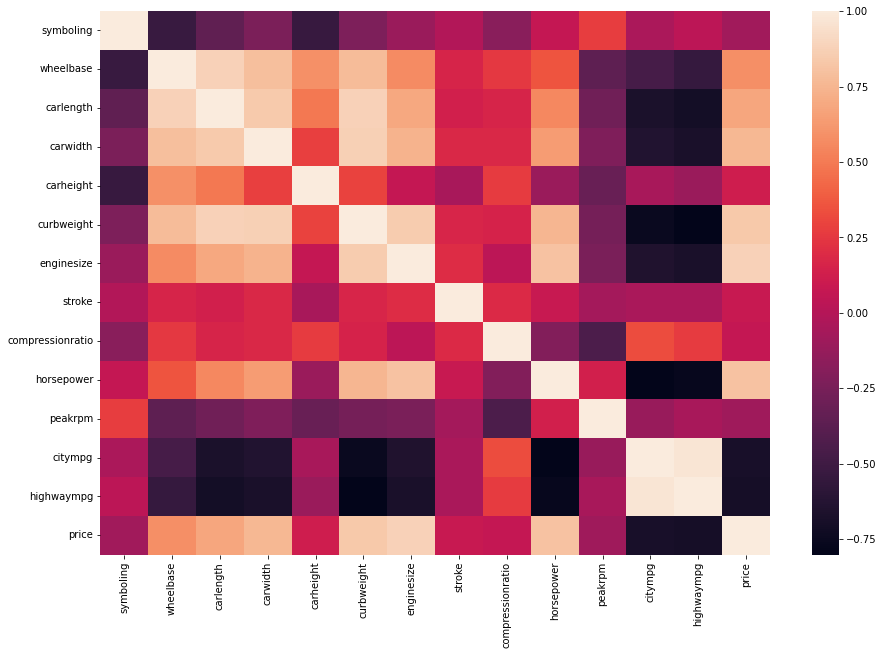

In [106]:
plt.subplots(figsize = (15, 10))

sns.heatmap(df.corr())

In [107]:
# Variables Numericas 
# •	Wheelbase
# •	Carlength 
# •	Carwidth 
# •	Carweight 
# •	Enginesize 
# •	Horsepower

# Variables Categoricas 
# •	Cylindernumber 
# •	Carbody 
# •	Fuletype 

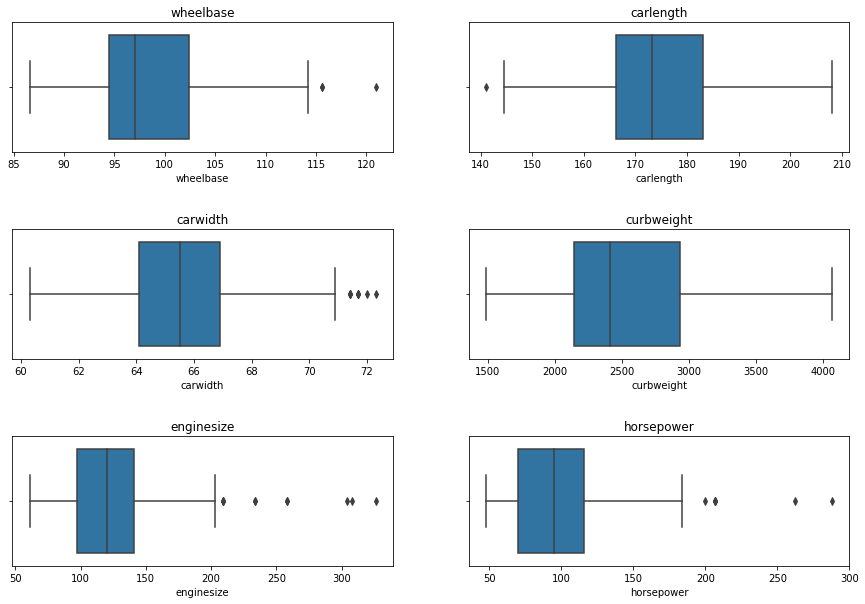

In [108]:
# Boxplots variables numericas
fig, ax = plt.subplots(3, 2, figsize = (15, 10))

ax1 = sns.boxplot(data = df, x = "wheelbase", ax = ax[0][0])
ax1.set_title("wheelbase")

ax2 = sns.boxplot(data = df, x = "carlength", ax = ax[0][1])
ax2.set_title("carlength")

ax3 = sns.boxplot(data = df, x = "carwidth", ax = ax[1][0])
ax3.set_title("carwidth")

ax4 = sns.boxplot(data = df, x = "curbweight", ax = ax[1][1])
ax4.set_title("curbweight")

ax5 = sns.boxplot(data = df, x = "enginesize", ax = ax[2][0])
ax5.set_title("enginesize")

ax6 = sns.boxplot(data = df, x = "horsepower", ax = ax[2][1])
ax6.set_title("horsepower")

plt.subplots_adjust(hspace=0.6)
plt.show()

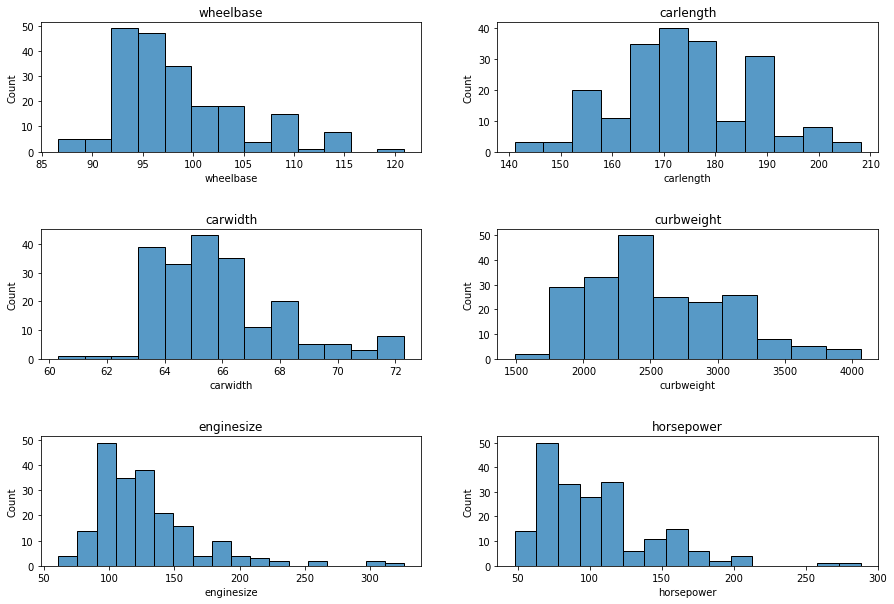

In [109]:
# Histogramas variables numericas
fig, ax = plt.subplots(3, 2, figsize = (15, 10))

ax1 = sns.histplot(data = df, x = "wheelbase", ax = ax[0][0])
ax1.set_title("wheelbase")

ax2 = sns.histplot(data = df, x = "carlength", ax = ax[0][1])
ax2.set_title("carlength")

ax3 = sns.histplot(data = df, x = "carwidth", ax = ax[1][0])
ax3.set_title("carwidth")

ax4 = sns.histplot(data = df, x = "curbweight", ax = ax[1][1])
ax4.set_title("curbweight")

ax5 = sns.histplot(data = df, x = "enginesize", ax = ax[2][0])
ax5.set_title("enginesize")

ax6 = sns.histplot(data = df, x = "horsepower", ax = ax[2][1])
ax6.set_title("horsepower")

plt.subplots_adjust(hspace=0.6)
plt.show()

In [110]:
# Estadistica variables numericas
variables = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "horsepower"]
std = []
media = []
mode = []

for variable in variables:
    std.append(df[variable].std())
    media.append(df[variable].mean())
    mode.append(df[variable].mode()[0])
    
pd.DataFrame(columns = variables, data = [std, media, mode], index = ["std", "mean", "mode"])

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower
std,6.021776,12.337289,2.145204,520.680204,41.642693,39.544167
mean,98.756585,174.049268,65.907805,2555.565854,126.907317,104.117073
mode,94.500000,157.300000,63.800000,2385.000000,92.000000,68.000000


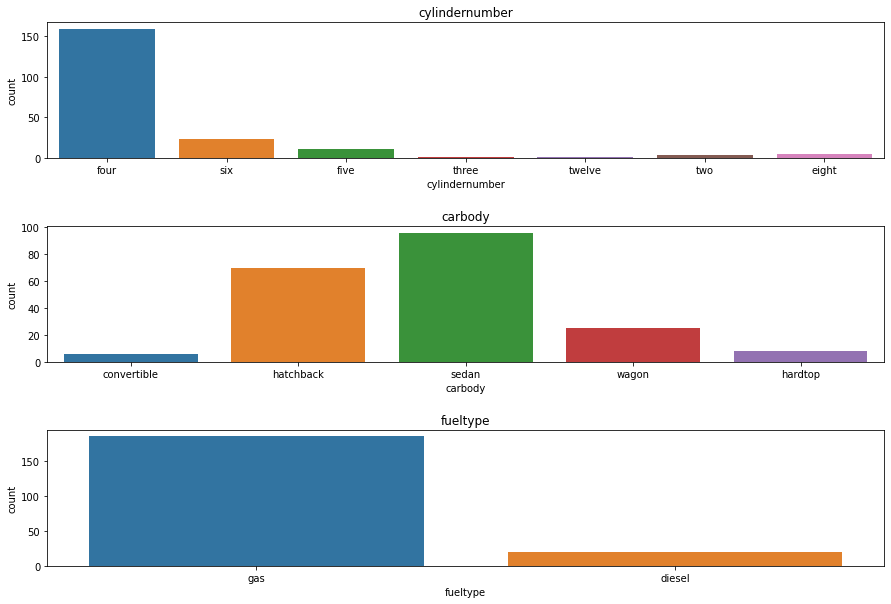

In [111]:
# Barplot variables categoricas 
fig, ax = plt.subplots(3, 1, figsize = (15, 10))

ax1 = sns.countplot(data = df, x = "cylindernumber", ax = ax[0])
ax1.set_title("cylindernumber")

ax2 = sns.countplot(data = df, x = "carbody", ax = ax[1])
ax2.set_title("carbody")

ax3 = sns.countplot(data = df, x = "fueltype", ax = ax[2])
ax3.set_title("fueltype")

plt.subplots_adjust(hspace=0.5)
plt.show()


In [112]:
# Analisis variables categoricas
print(pd.crosstab(df["cylindernumber"], df["carbody"]), "\n")

print(pd.crosstab(df["cylindernumber"], df["fueltype"]), "\n")

print(pd.crosstab(df["carbody"], df["fueltype"]), "\n")

carbody         convertible  hardtop  hatchback  sedan  wagon
cylindernumber                                               
eight                     1        1          1      2      0
five                      0        1          1      7      2
four                      4        4         57     73     21
six                       1        2          6     13      2
three                     0        0          1      0      0
twelve                    0        0          0      1      0
two                       0        0          4      0      0 

fueltype        diesel  gas
cylindernumber             
eight                0    5
five                 4    7
four                15  144
six                  1   23
three                0    1
twelve               0    1
two                  0    4 

fueltype     diesel  gas
carbody                 
convertible       0    6
hardtop           1    7
hatchback         1   69
sedan            15   81
wagon             3   22 



In [113]:
# Regresion Linear 
df.corr()["price"].reset_index()


,index,price
0,symboling,-0.079978
1,wheelbase,0.577816
2,carlength,0.682920
3,carwidth,0.759325
4,carheight,0.119336
5,curbweight,0.835305
6,enginesize,0.874145
7,stroke,0.079443
8,compressionratio,0.067984
9,horsepower,0.808139


In [114]:
x_values = df[["carwidth", "carlength", "curbweight", "enginesize", "horsepower", "highwaympg"]]

y_values = df[["price"]]

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size= 0.1, random_state = 1)

In [115]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [116]:
model.score(x_train, y_train)
model.score(x_test, y_test)

0.7390391480652576

In [117]:
y_predict = model.predict(x_test)

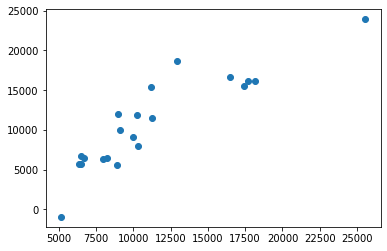

In [118]:
plt.clf()
plt.scatter(y_test, y_predict)
plt.show()

In [122]:
df.groupby(["cylindernumber", "carbody"])["price"].mean().reset_index().sort_values(by = "price")

,cylindernumber,carbody,price
18,three,hatchback,5151.000000
10,four,hatchback,9044.245614
9,four,hardtop,9384.000000
11,four,sedan,10837.479452
12,four,wagon,11046.761905
20,two,hatchback,13020.000000
8,four,convertible,14814.750000
17,six,wagon,15074.500000
15,six,hatchback,17392.166667
5,five,hatchback,17859.167000
